# Поиск выбросов

In [3]:
!pip3 install pandas

You should consider upgrading via the '/Users/kujilit/Documents/repos/fefu/venv/bin/python3 -m pip install --upgrade pip' command.


In [4]:
!pip install seaborn

You should consider upgrading via the '/Users/kujilit/Documents/repos/fefu/venv/bin/python3 -m pip install --upgrade pip' command.


In [5]:
!pip install scipy

You should consider upgrading via the '/Users/kujilit/Documents/repos/fefu/venv/bin/python3 -m pip install --upgrade pip' command.


In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

In [7]:
SEED = 42
Z_THRESHOLD = 3

In [8]:
np.random.seed(SEED)

normal_salaries = np.random.normal(loc=70_000, scale=10_000, size=98).astype(int)

outlier_salaries = np.array([500_000, 350_000, 700_000, 450_000])

all_salaries = np.concatenate([normal_salaries, outlier_salaries])

data = pd.DataFrame({'Зарплата': all_salaries})

In [9]:
data

,Зарплата
0,74967
1,68617
2,76476
3,85230
4,67658
...,...
97,72610
98,500000
99,350000
100,700000


In [10]:
data.head(5)

,Зарплата
0,74967
1,68617
2,76476
3,85230
4,67658


In [11]:
data.dtypes

Зарплата    int64
dtype: object

In [12]:
data.describe()

,Зарплата
count,102.000000
mean,85866.637255
std,88283.364075
min,43802.000000
25%,64089.000000
50%,69460.000000
75%,75943.250000
max,700000.000000


In [13]:
Q1 = data['Зарплата'].quantile(0.25)
Q3 = data['Зарплата'].quantile(0.75)
IQR = Q3 - Q1

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

print(f"Q1 (25-й перцентиль): {Q1}")
print(f"Q3 (75-й перцентиль): {Q3}")
print(f"IQR: {IQR}")
print(f"Нижняя граница: {lower_bound}")
print(f"Верхняя граница: {upper_bound}")

outliers_iqr = data[(data['Зарплата'] < lower_bound) | (data['Зарплата'] > upper_bound)]
print(f"\nКоличество выбросов по методу IQR: {len(outliers_iqr)}")
print("Выбросы:")
print(outliers_iqr)

Q1 (25-й перцентиль): 64089.0
Q3 (75-й перцентиль): 75943.25
IQR: 11854.25
Нижняя граница: 46307.625
Верхняя граница: 93724.625

Количество выбросов по методу IQR: 5
Выбросы:
     Зарплата
74      43802
98     500000
99     350000
100    700000
101    450000


In [ ]:
data['Z_Score'] = np.abs(stats.zscore(data['Зарплата']))

outliers_z = data[data['Z_Score'] > Z_THRESHOLD]

print(f"Количество выбросов по методу Z-Score (порог = {Z_THRESHOLD}): {len(outliers_z)}")
print("Выбросы:")
print(outliers_z[['Зарплата', 'Z_Score']])

Количество выбросов по методу Z-Score (порог = 3): 4
Выбросы:
     Зарплата   Z_Score
98     500000  4.714121
99     350000  3.006656
100    700000  6.990741
101    450000  4.144966


In [15]:
df_cleaned = data.copy()

In [16]:
df_removed = df_cleaned[(df_cleaned['Зарплата'] >= lower_bound) & (df_cleaned['Зарплата'] <= upper_bound)]

print(f"Размер датасета до удаления: {df_cleaned.shape[0]}")
print(f"Размер датасета после удаления: {df_removed.shape[0]}")

Размер датасета до удаления: 102
Размер датасета после удаления: 97


In [17]:
df_cleaned['Зарплата_обработанная'] = df_cleaned['Зарплата']

df_cleaned.loc[df_cleaned['Зарплата'] > upper_bound, 'Зарплата_обработанная'] = upper_bound
df_cleaned.loc[df_cleaned['Зарплата'] < lower_bound, 'Зарплата_обработанная'] = lower_bound

outliers_replaced = df_cleaned[df_cleaned['Зарплата'] != df_cleaned['Зарплата_обработанная']]
print(outliers_replaced[['Зарплата', 'Зарплата_обработанная']])

     Зарплата  Зарплата_обработанная
74      43802              46307.625
98     500000              93724.625
99     350000              93724.625
100    700000              93724.625
101    450000              93724.625


/var/folders/yh/cxsb5r2n4hdfpgz1pmp1lh3h0000gn/T/ipykernel_13835/4135511837.py:3: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '93724.625' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  df_cleaned.loc[df_cleaned['Зарплата'] > upper_bound, 'Зарплата_обработанная'] = upper_bound


=== ДО ОБРАБОТКИ ===
count       102.000000
mean      85866.637255
std       88283.364075
min       43802.000000
25%       64089.000000
50%       69460.000000
75%       75943.250000
max      700000.000000
Name: Зарплата, dtype: float64

=== ПОСЛЕ ЗАМЕНЫ ВЫБРОСОВ ===
count      102.000000
mean     69958.834559
std      10144.480841
min      46307.625000
25%      64089.000000
50%      69460.000000
75%      75943.250000
max      93724.625000
Name: Зарплата_обработанная, dtype: float64


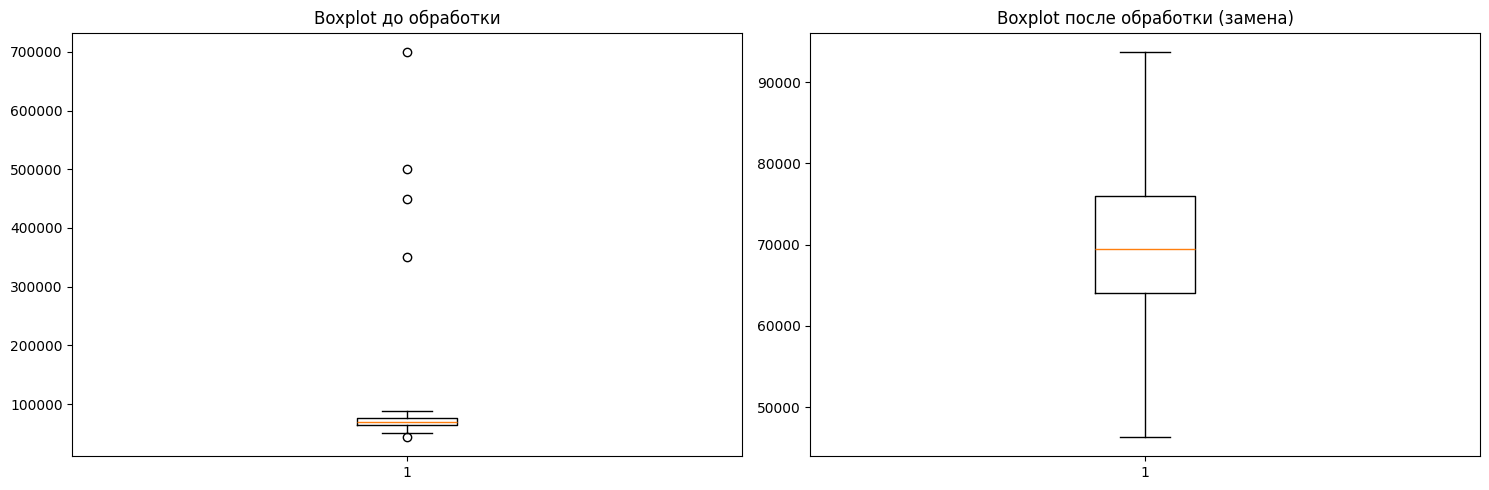

In [18]:
# Сравним описательную статистику до и после обработки (метод замены)
print("=== ДО ОБРАБОТКИ ===")
print(data['Зарплата'].describe())

print("\n=== ПОСЛЕ ЗАМЕНЫ ВЫБРОСОВ ===")
print(df_cleaned['Зарплата_обработанная'].describe())

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 5))

ax1.boxplot(data['Зарплата'])
ax1.set_title('Boxplot до обработки')

ax2.boxplot(df_cleaned['Зарплата_обработанная'])
ax2.set_title('Boxplot после обработки (замена)')

plt.tight_layout()
plt.show()

In [19]:
!pip install datasets

You should consider upgrading via the '/Users/kujilit/Documents/repos/fefu/venv/bin/python3 -m pip install --upgrade pip' command.


In [ ]:
from datasets import load_dataset

diabetes = load_dataset("GB2024/diabetes")


/Users/kujilit/Documents/repos/fefu/venv/lib/python3.9/site-packages/urllib3/__init__.py:35: NotOpenSSLWarning: urllib3 v2 only supports OpenSSL 1.1.1+, currently the 'ssl' module is compiled with 'LibreSSL 2.8.3'. See: https://github.com/urllib3/urllib3/issues/3020
  warnings.warn(
/Users/kujilit/Documents/repos/fefu/venv/lib/python3.9/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [21]:
diabetes

DatasetDict({
    train: Dataset({
        features: ['gender', 'age', 'hypertension', 'heart_disease', 'smoking_history', 'bmi', 'HbA1c_level', 'blood_glucose_level', 'diabetes'],
        num_rows: 100000
    })
})

In [22]:
diabetes = diabetes["train"].to_pandas()

In [30]:
diabetes.describe()

,age,hypertension,heart_disease,bmi,HbA1c_level,blood_glucose_level,diabetes,Z_Score
count,100000.000000,100000.00000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000
mean,41.885856,0.07485,0.039420,27.320767,5.527507,138.058060,0.085000,0.665761
std,22.516840,0.26315,0.194593,6.636783,1.070672,40.708136,0.278883,0.746168
min,0.080000,0.00000,0.000000,10.010000,3.500000,80.000000,0.000000,0.000116
25%,24.000000,0.00000,0.000000,23.630000,4.800000,100.000000,0.000000,0.000116
50%,43.000000,0.00000,0.000000,27.320000,5.800000,140.000000,0.000000,0.458171
75%,60.000000,0.00000,0.000000,29.580000,6.200000,159.000000,0.000000,1.057631
max,80.000000,1.00000,1.000000,95.690000,9.000000,300.000000,1.000000,10.301613


In [24]:
diabetes["bmi"].describe()

count    100000.000000
mean         27.320767
std           6.636783
min          10.010000
25%          23.630000
50%          27.320000
75%          29.580000
max          95.690000
Name: bmi, dtype: float64

In [25]:
Q1 = diabetes['bmi'].quantile(0.25)
Q3 = diabetes['bmi'].quantile(0.75)
IQR = Q3 - Q1

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

print(f"Q1 (25-й перцентиль): {Q1}")
print(f"Q3 (75-й перцентиль): {Q3}")
print(f"IQR: {IQR}")
print(f"Нижняя граница: {lower_bound}")
print(f"Верхняя граница: {upper_bound}")

outliers_iqr = diabetes[(diabetes['bmi'] < lower_bound) | (diabetes['bmi'] > upper_bound)]
print(f"\nКоличество выбросов по методу IQR: {len(outliers_iqr)}")

Q1 (25-й перцентиль): 23.63
Q3 (75-й перцентиль): 29.58
IQR: 5.949999999999999
Нижняя граница: 14.705
Верхняя граница: 38.504999999999995

Количество выбросов по методу IQR: 7086


In [26]:
diabetes['Z_Score'] = np.abs(stats.zscore(diabetes['bmi']))

outliers_z = diabetes[diabetes['Z_Score'] > Z_THRESHOLD]

print(f"Количество выбросов по методу Z-Score (порог = {Z_THRESHOLD}): {len(outliers_z)}")
print("Выбросы:")
print(outliers_z[['bmi', 'Z_Score']])

Количество выбросов по методу Z-Score (порог = 3): 1294
Выбросы:
         bmi   Z_Score
11     54.70  4.125398
39     56.43  4.386067
59     63.48  5.448334
93     55.61  4.262513
98     50.13  3.436807
...      ...       ...
99770  59.45  4.841109
99793  50.85  3.545294
99844  59.42  4.836589
99853  47.42  3.028475
99953  60.52  5.002333

[1294 rows x 2 columns]


In [27]:
bmi_removed = diabetes[(diabetes['bmi'] >= lower_bound) & (diabetes['bmi'] <= upper_bound)]

print(f"Размер датасета до удаления: {diabetes.shape[0]}")
print(f"Размер датасета после удаления: {bmi_removed.shape[0]}")

Размер датасета до удаления: 100000
Размер датасета после удаления: 92914


In [28]:
diabetes_copy = diabetes.copy()
diabetes_copy['bmi_by_bound'] = diabetes_copy['bmi']

diabetes_copy.loc[diabetes_copy['bmi'] > upper_bound, 'bmi_by_bound'] = upper_bound
diabetes_copy.loc[diabetes_copy['bmi'] < lower_bound, 'bmi_by_bound'] = lower_bound

outliers_replaced = diabetes_copy[diabetes_copy['bmi'] != diabetes_copy['bmi_by_bound']]
print(outliers_replaced[['bmi', 'bmi_by_bound']])

         bmi  bmi_by_bound
11     54.70        38.505
24     13.99        14.705
39     56.43        38.505
59     63.48        38.505
93     55.61        38.505
...      ...           ...
99933  13.34        14.705
99948  39.62        38.505
99953  60.52        38.505
99960  45.15        38.505
99993  40.69        38.505

[7086 rows x 2 columns]


=== ДО ОБРАБОТКИ ===
count    100000.000000
mean         27.320767
std           6.636783
min          10.010000
25%          23.630000
50%          27.320000
75%          29.580000
max          95.690000
Name: bmi, dtype: float64

=== ПОСЛЕ ЗАМЕНЫ ВЫБРОСОВ ===
count    100000.000000
mean         26.991686
std           5.671428
min          14.705000
25%          23.630000
50%          27.320000
75%          29.580000
max          38.505000
Name: bmi_by_bound, dtype: float64


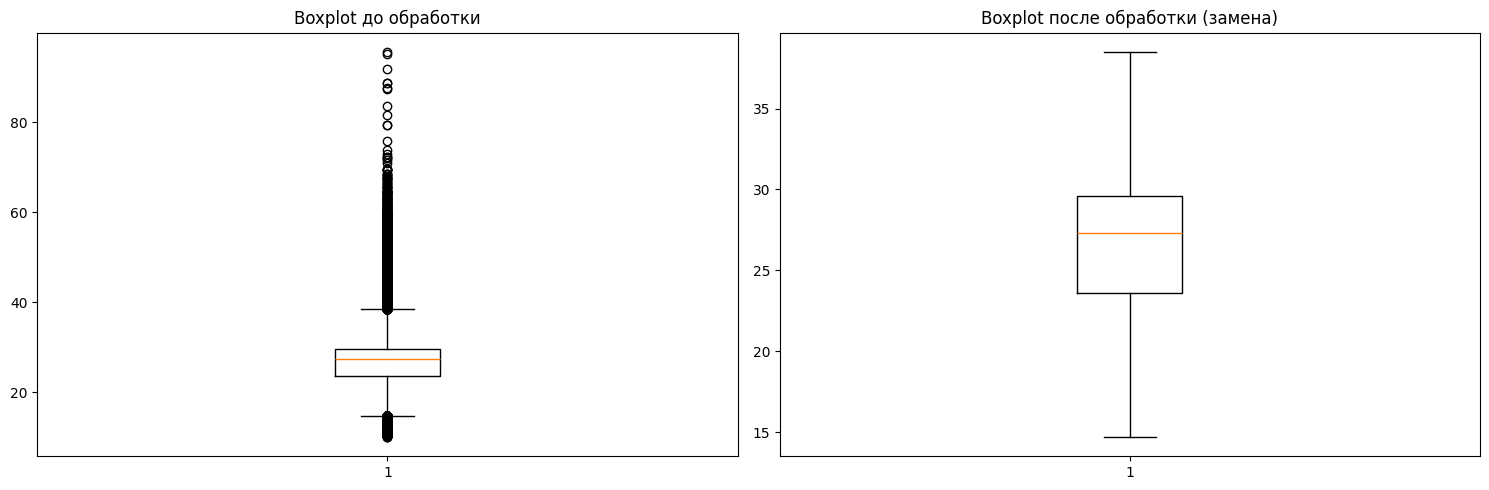

In [29]:
print("=== ДО ОБРАБОТКИ ===")
print(diabetes['bmi'].describe())

print("\n=== ПОСЛЕ ЗАМЕНЫ ВЫБРОСОВ ===")
print(diabetes_copy['bmi_by_bound'].describe())

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 5))

ax1.boxplot(diabetes['bmi'])
ax1.set_title('Boxplot до обработки')

ax2.boxplot(diabetes_copy['bmi_by_bound'])
ax2.set_title('Boxplot после обработки (замена)')

plt.tight_layout()
plt.show()